✍ Вы уже изучили два метода кластеризации и даже попрактиковались на кейсе. Однако этих алгоритмов недостаточно, чтобы решить любую задачу, с которой вы столкнётесь, поэтому мы продолжаем наше погружение в алгоритмы кластеризации.

В этом юните мы разберём ещё один вид кластеризации — **DBSCAN**.

Этот алгоритм хорошо подходит для ситуаций, когда необходимо выделить кластеры различной, порой довольно сложной формы. Такая задача достаточно часто возникает при анализе географических данных: например, при выделении кластеров пользователей по геометкам.

### **Основная идея** этого алгоритма заключается в том, что объект  принадлежит кластеру, если находится достаточно близко ко многим объектам из этого кластера.



На картинке ниже вы видите объекты, которые легко разделяются на три кластера. В такой ситуации можно без проблем применить, например, k-means или EM-алгоритм и получить хороший результат.

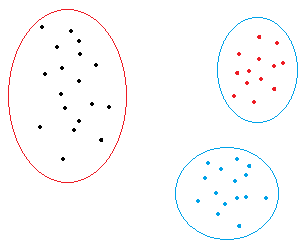

Совсем другая ситуация — на рисунках ниже:

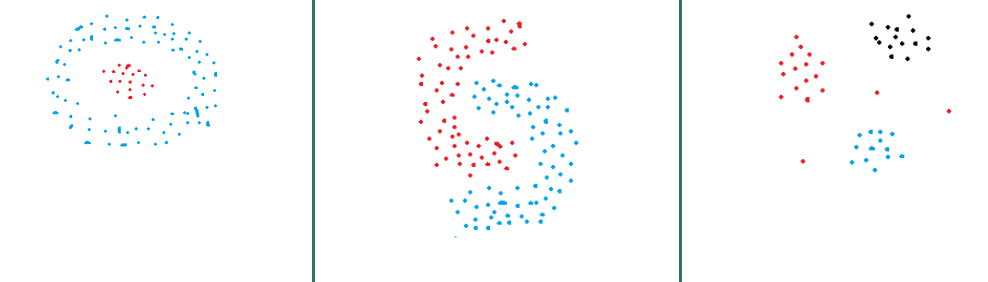

Точки здесь сгруппированы в произвольных формах. Также присутствуют точки-выбросы. К сожалению, те же k-means или EM-алгоритм не смогут кластеризовать такие данные корректно, а вот алгоритмы кластеризации на основе плотности (к которым относится DBSCAN) очень эффективны в таких ситуациях.

*Давайте попробуем интуитивно разобраться в этом алгоритме.*

Представим, что на вечеринку пришло много людей. Как это обычно бывает, люди стоят небольшими компаниями. Наша задача — выявить эти компании. С первого взгляда кажется, что это несложно. Но что, если группы будут разной формы? Кто-то стоит кругом, кто-то — вдоль барной стойки, а какая-то компания образовала полукруг, чтобы было удобнее смотреть смешное видео с планшета. Есть, разумеется, и одиночки, и пары людей:

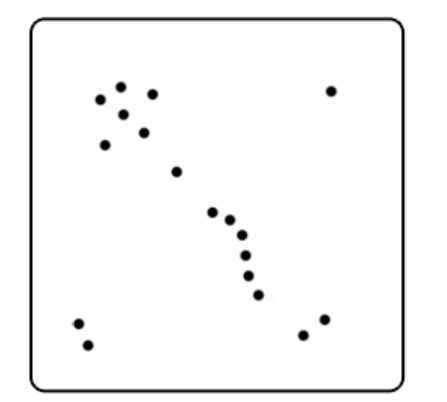

Для того чтобы выделить группы, сначала надо понять, что такое группа:

+ Нужен параметр, который будет определять, насколько близко должны стоять люди, чтобы их можно было отнести к одной группе.
+ Необходимо решить, какое минимальное число людей может считаться группой. Один человека — это группа? А два, три?

Будем считать, что минимальное число людей в группе — три. Все люди, у которых есть хотя бы три соседа (включая самого рассматриваемого человека), — это центральные элементы группы, их мы отметим **зелёным**.

Жёлтым отметим тех людей, которые являются граничными(*те, кто находится в "зеленой" группе, но не является ее центральным элементом*) элементами, а красным — шумовыми(*одиночки, которые не являются ни центральными, ни граничными элементами ни в одной группе*)

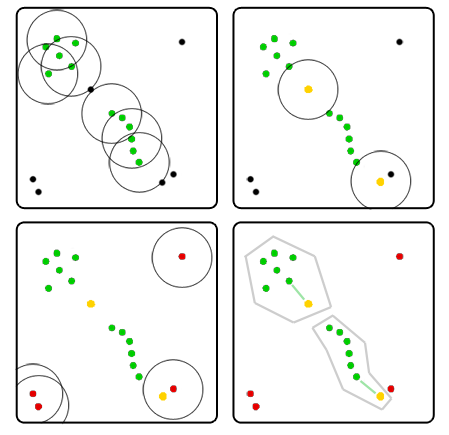

Можно записать этот процесс в виде итеративного алгоритма:

+ Берём случайного человека.
+ Если рядом с этим человеком стоит меньше трёх других (включая его самого), считаем данного человека одиночкой.
+ Если же рядом с человеком стоит не менее трёх людей (включая его самого), тогда:
  + считаем, что этот человек находится в группе;
  + среди людей, которые находятся рядом с ним, есть те, у кого также не менее трёх соседей — добавляем их в эту же группу;
  + если среди людей, которые находятся рядом, есть те, у кого меньше трёх соседей, — это граничные элементы, и они тоже будут относиться к группе.
+ Центральные и граничные элементы определены, все остальные — одиночки (шумовые элементы).


### Мы рассмотрели, как работает данный алгоритм, на совсем простом примере, без математики. Теперь давайте возьмём вычислительный пример, чтобы лучше разобраться в принципе работы DBSCAN.

Пусть у нас есть девять точек: $x_1 (0,0), x_2 (1,0), x_3 (1,1), x_4 (2,2), x_5 (3,1), x_6 (3,0), x_7 (0,1), x_8 (3,2), x_9 (6,3)$. Мы хотим кластеризовать их.

Пусть значение min_samples, при котором группа точек становится кластером, будет равно 3. В качестве метрики, по которой мы будем определять, какие точки являются достаточно близкими, чтобы быть в одной группе, возьмём радиус, равный 1 (параметр eps).

Для начала просто изобразим наши точки:

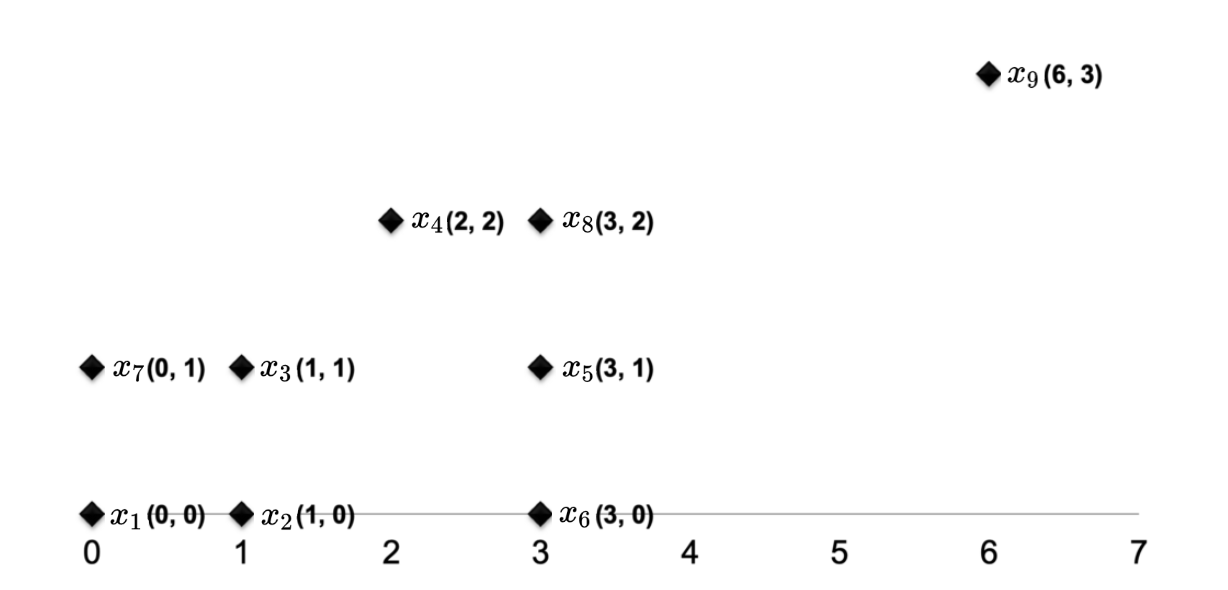

Далее для каждой точки найдём точки, которые являются для неё достаточно близкими (считая её саму), то есть попадают в окружность радиуса 1, проведённую с центром в этой точке:

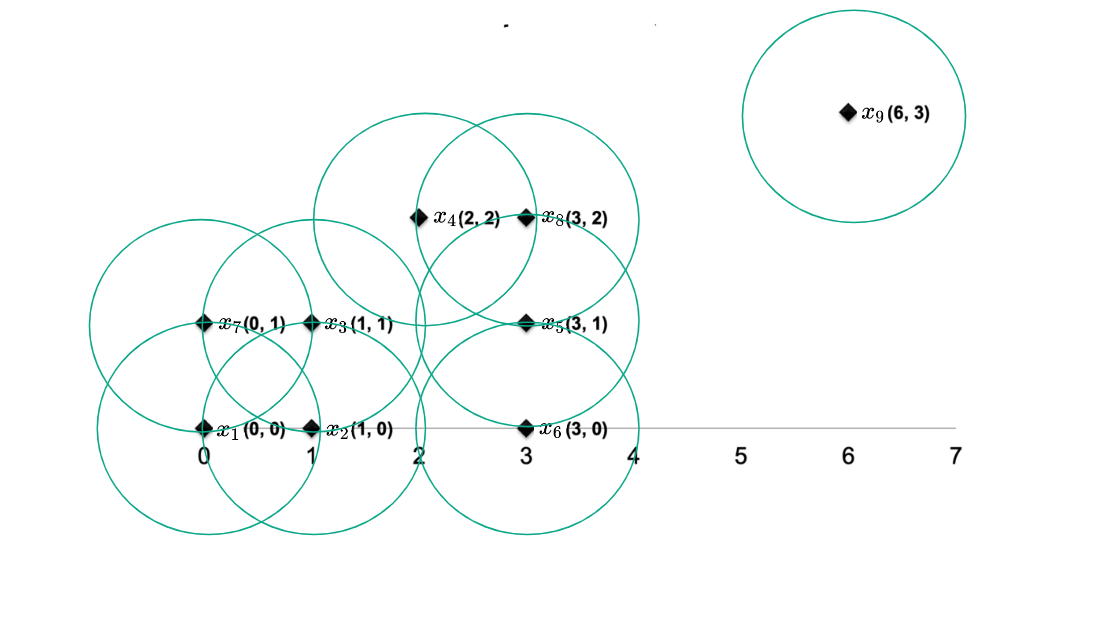



Выпишем множества $N$ близких точек для каждой точки:

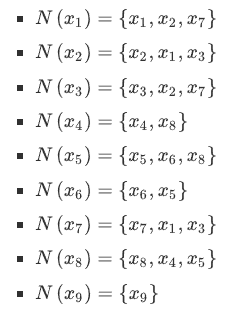

Поясним, как это можно определить. Конечно, в нашем случае мы могли бы просто посмотреть на картинку с окружностями, приведённую выше. Однако это «ручной» подход, и его нельзя применять на хоть сколько-то больших данных, так что рассмотрим вычислительный вариант.

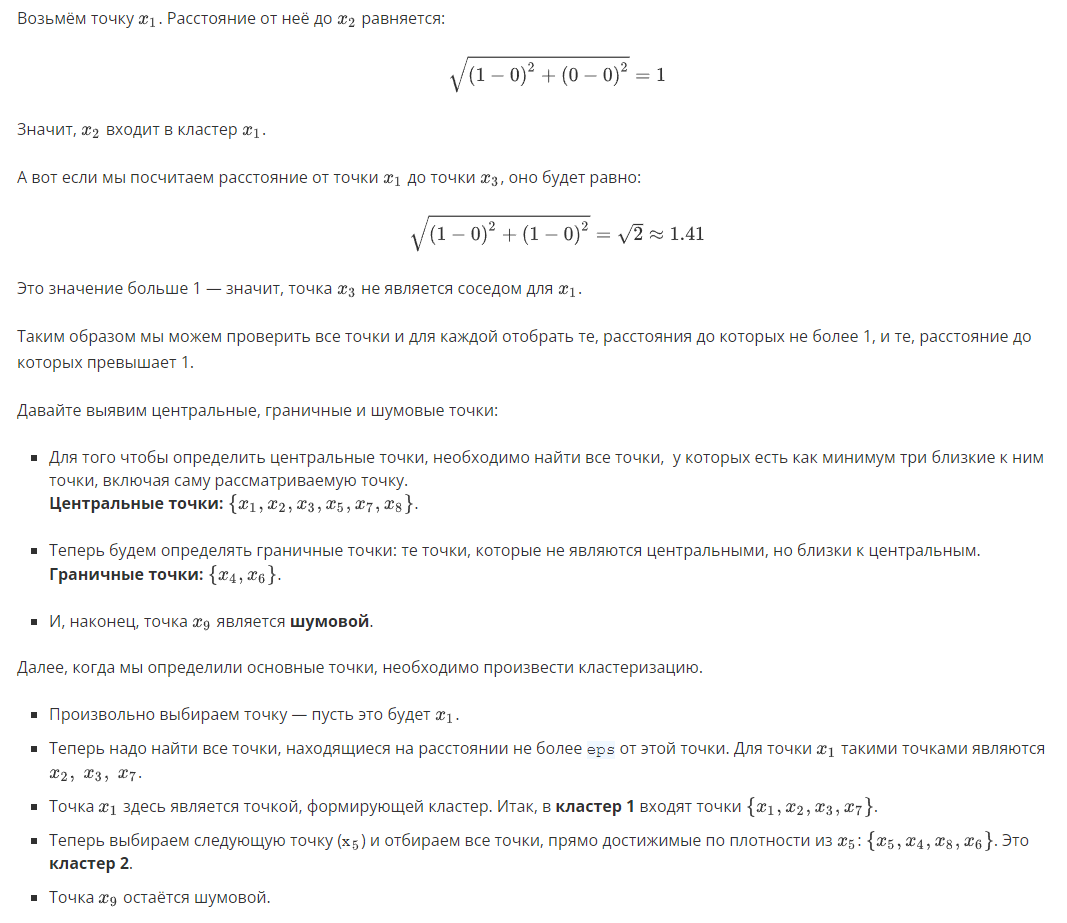

Если визуализировать результат, то мы получаем следующее:

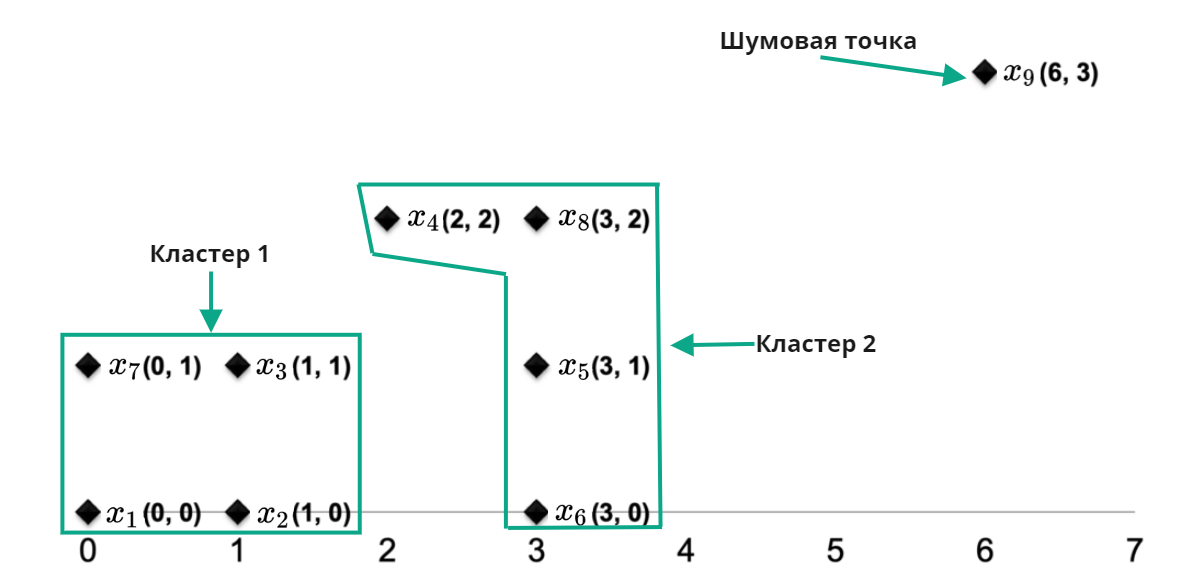

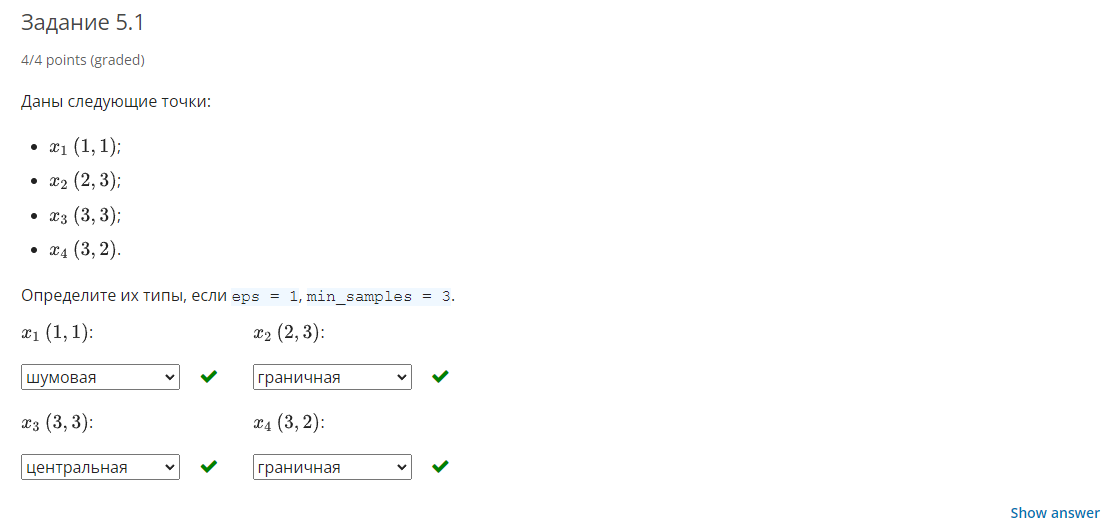

*Теперь, когда мы буквально вручную реализовали алгоритм DBSCAN, резюмируем всё, что рассмотрели ранее, в более чёткую и формальную структуру.*

## **Алгоритм DBSCAN инициализируется двумя параметрами:**

+ eps — расстояние, определяющее окрестности. Две точки считаются достаточно близкими, чтобы находиться в одном кластере, если расстояние между ними меньше или равно eps. В библиотеке sklearn оно по умолчанию равно 0.5.
+ min_samples — минимальное количество точек в данных, которое может быть в кластере. В библиотеке sklearn оно по умолчанию равно 5.

### Эти параметры очень сильно влияют на результат кластеризации, и следует перебирать разные варианты, т. к. их подходящие значения (особенно eps) может быть сложно подобрать. Не стоит опираться только на результаты алгоритма, обученного со значениями по умолчанию. 


## На основании этих двух параметров точки классифицируются как **центральные** (их ещё часто называют **корневыми** или **основными**), **граничные** и **шумовые**:

+ Точка является **центральной**, если в её окрестностях имеется не менее min_samples точек (включая саму точку). Окрестность определяется как область внутри окружности радиуса eps, центр которой находится в центральной точке.

+ Точка является **граничной**, если она достижима из центральной точки (то есть находится в окрестности центральной точки) и количество точек в её окрестностях меньше min_samples.

+ Точка называется **шумовой**, если она не является центральной и не достижима ни из одной из центральных точек (то есть не находится в окрестностях центральных точек).


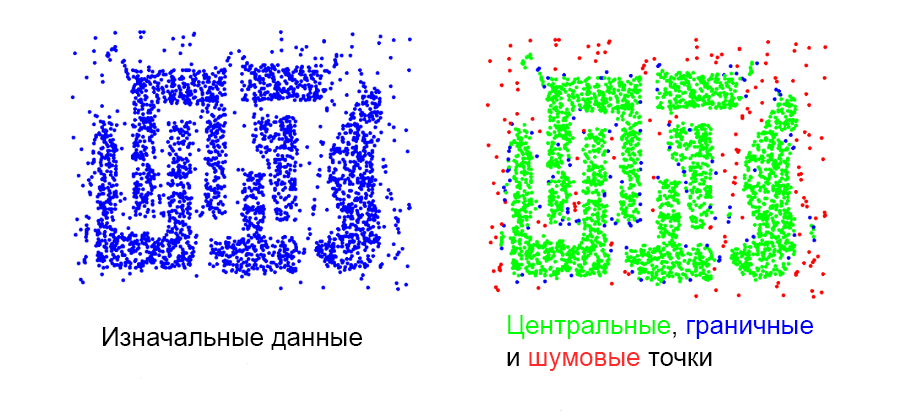


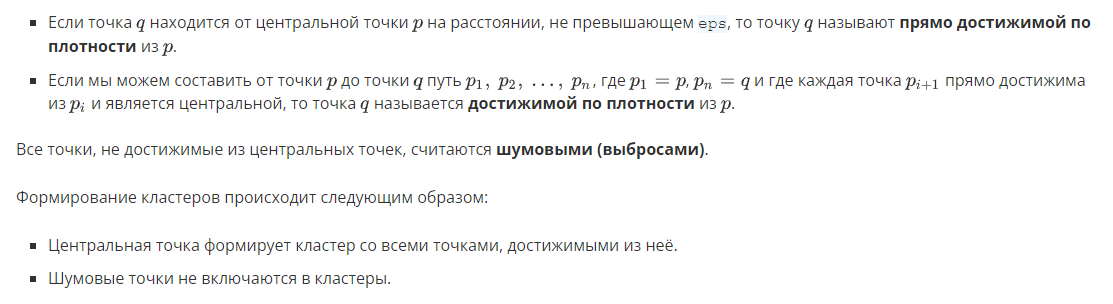

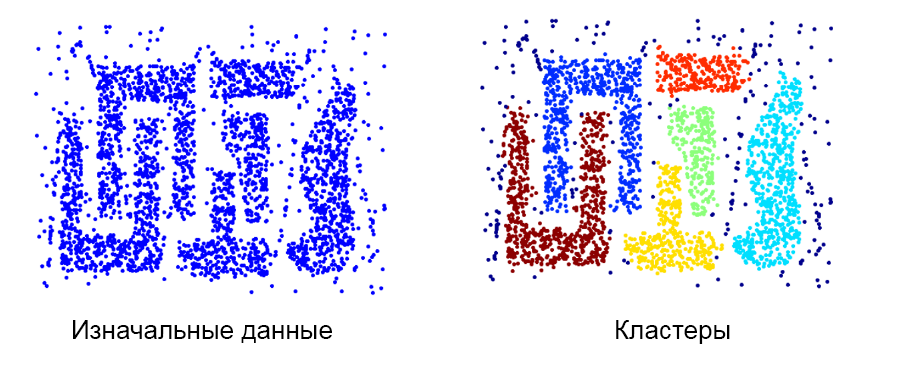



Ниже представлена визуализация работы алгоритма DBSCAN:

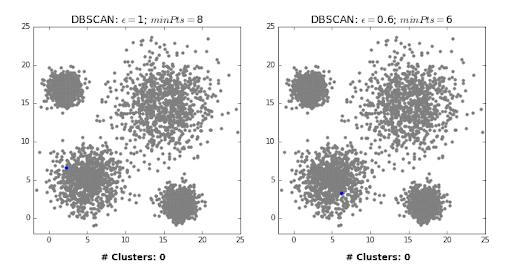

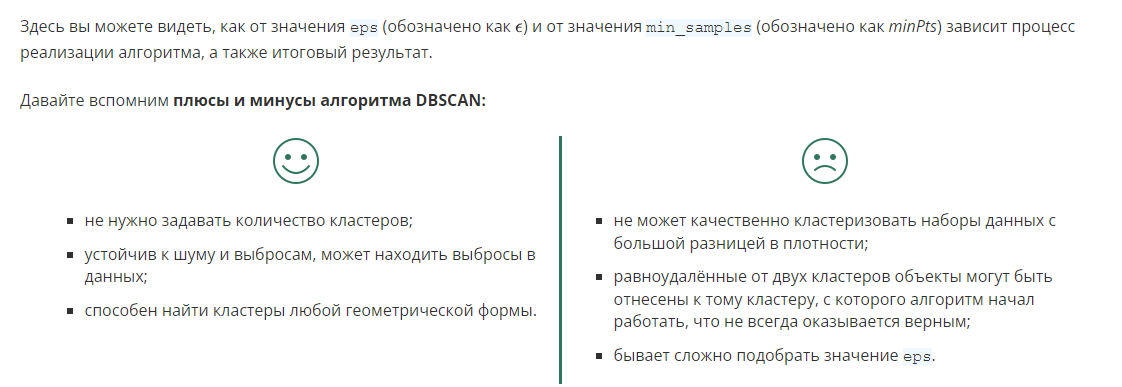

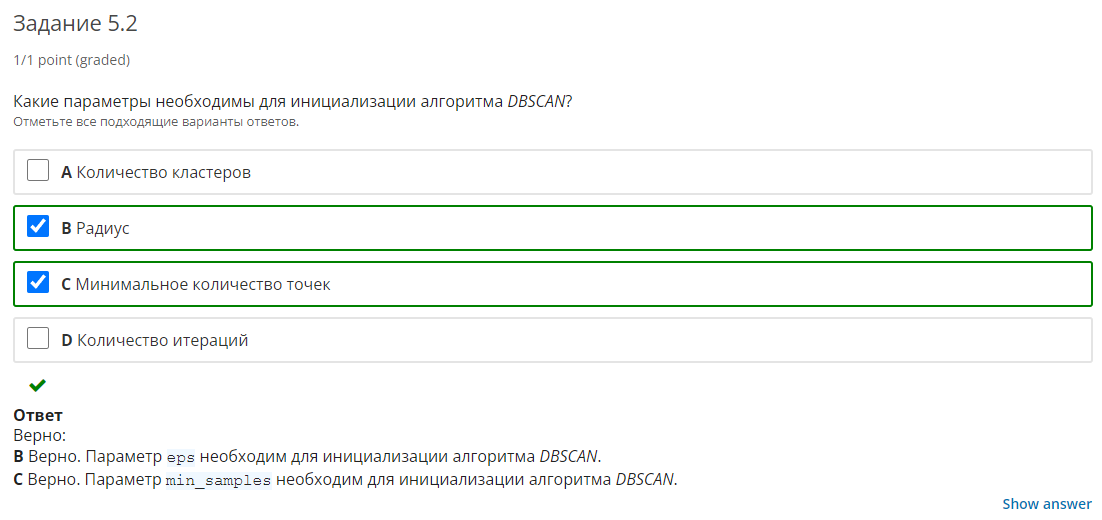

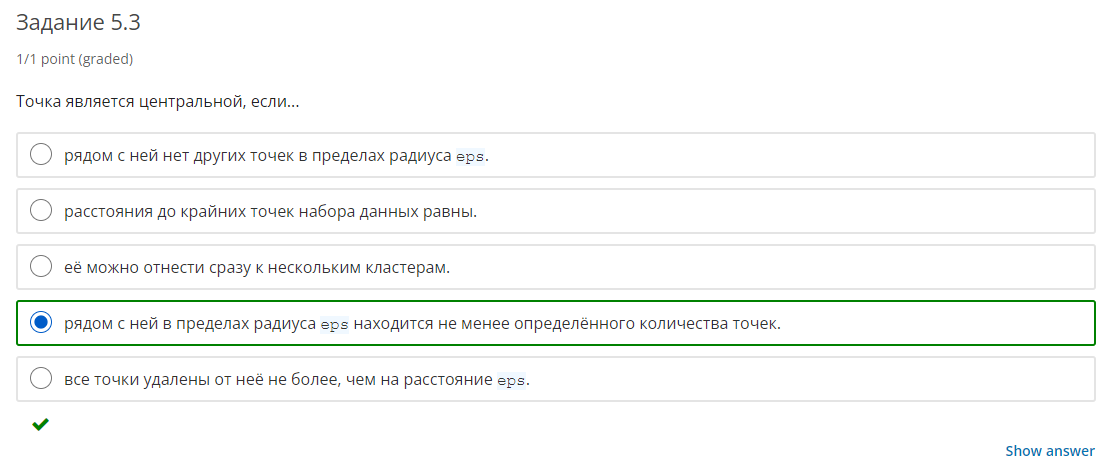

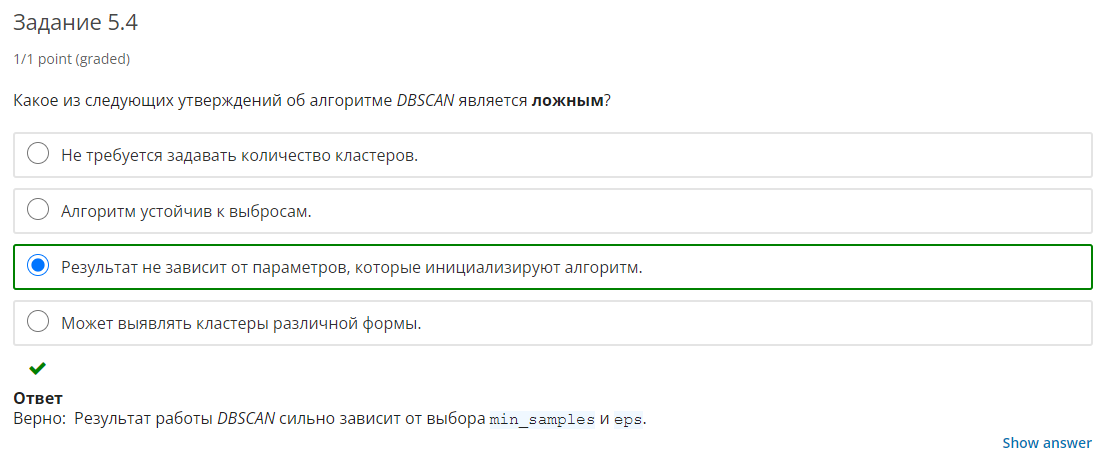

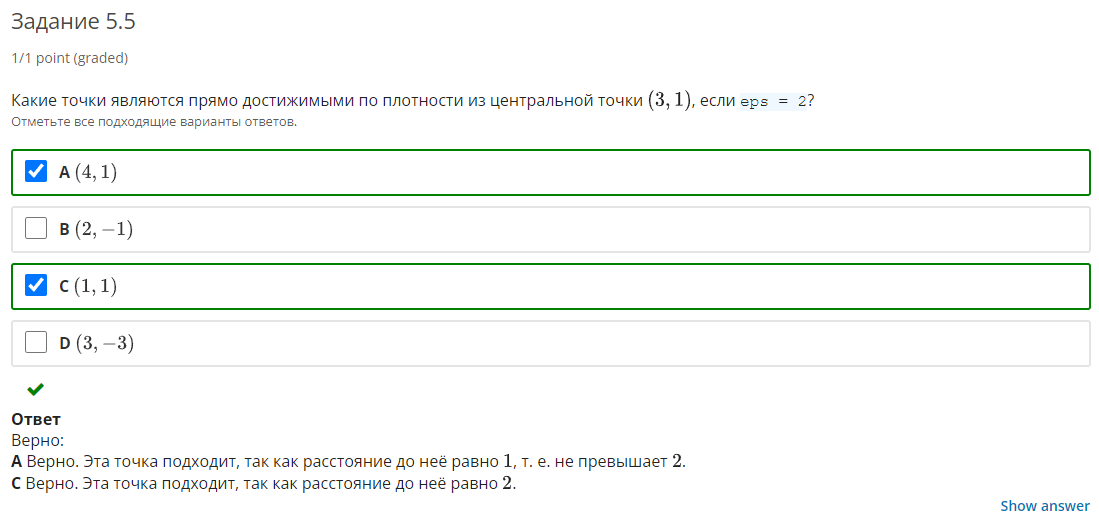

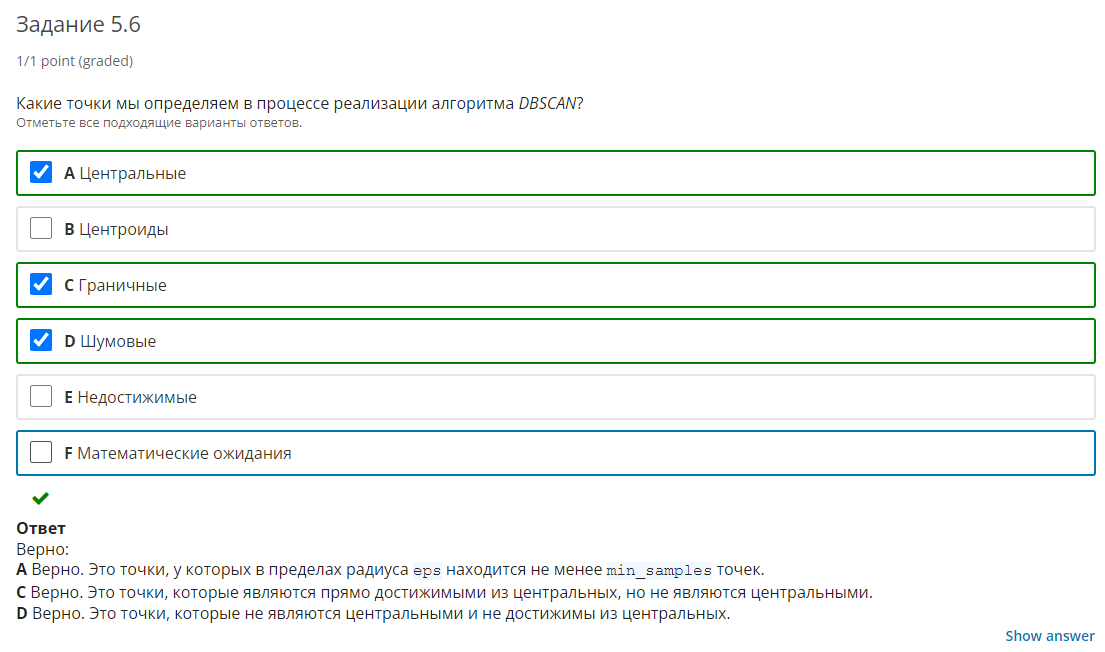

В этом юните мы изучили алгоритм DBSCAN: подробно рассмотрели его реализацию и даже «вручную» решили с его помощью задачу кластеризации. Осталось познакомиться с последним алгоритмом кластеризации — он ждёт вас уже в следующем юните →